## Setup
Consider a 1D quantum circuit solely composed of $X_i$ and $Z_i Z_{i+1}$. At each time step $t$:
1. On each even bound $(i, i+1)$, with probability $p$ apply $Z_i Z_{i+1}$ measurement and with probability $(1-p)$ apply measurement $X_i$.
2. On each odd bound $(i, i+1)$, with probability $p$ apply $Z_i Z_{i+1}$ measurement and with probability $(1-p)$ apply measurement $X_i$

We are interested in the quantity:
$$ \Psi = \frac{1}{L} \sum_{i\neq j} \langle\phi| Z_i Z_j |\phi\rangle^2$$ 

We assume the initial state is the tensor product of $|+\rangle$ and $|-\rangle$, and we are restricted to the sub-Hilbert space that is accessible by our circuit from such initial states.

### Dynamics of the state
It's easy to check for the initial state $\Psi=0$.

We call $\frac{1}{\sqrt{2}}(|s\rangle + |s_c \rangle)$ a n-GHZ state, where $s$ is a string of $0$ and $1$ with length $n$. $|+\rangle$ and $|-\rangle$ are 1-GHZ states.

Generally, if we ZZ measure two qubits one from a $n$-GHZ state and the other from a $m$-GHZ, then the resulting state is a $(n+m)$-GHZ state. If the two qubits are from the same GHZ state, their state remain unchanged after the measurement.

So the total state is always the tensor product of several GHZ state. This naturally partites the spins into several disjoint sets $\{S_i\}$. Based on this we have:
$$\Psi = \frac{1}{L}\sum_{i\neq j}\mathbb{1}[\text{i and j are in the same set}]=\frac{1}{L}\sum_{S_i}{|S_i| \choose 2}$$

In [31]:
using Plots
using Base
using Random
using Statistics

In [32]:
function ZZ_measurement(spin_to_set, idx1, idx2)
    set1 = spin_to_set[idx1]
    set2 = spin_to_set[idx2]
    set1, set2 = min(set1, set2), max(set1, set2)
    if set1 != set2
        spin_to_set[spin_to_set.==set2] .= set1
    end
end

function X_measurement(spin_to_set, idx)
    set = spin_to_set[idx]
    if set != idx
        spin_to_set[idx] = idx
        return
    else
        indices = findall(spin_to_set .==set)
        if length(indices)==1
            return
        end
        new_set = indices[2]
        spin_to_set[indices[2:end]] .= new_set
    end
end

function cal_phi(spin_to_set)
    uni = unique(spin_to_set)
    counts = [count(spin_to_set.==val) for val in uni]
    return sum(counts .* (counts .- 1) ./ 2) / length(spin_to_set)
end

function cal_EE(spin_to_set, A, L)
    tmp = Array(1:L)
    
    in_mask = in.(tmp, Ref(A))
    out_mask = .! in_mask
    
    in_area = A
    out_area = tmp[out_mask]
    
    in_sets = unique(spin_to_set[in_mask])
    out_sets = unique(spin_to_set[out_mask])
    
    overlap = sum(in.(in_sets, Ref(out_sets)))
    
    return overlap
end

function cal_EE2(spin_to_set, middle_point, L)
    # the area on the right of 'middle_point' was considered sub-system
    in_set = unique(spin_to_set[middle_point:end])
    return count(in_set .< middle_point)
end
    

function linreg(x, y)
    mx = mean(x)
    my = mean(y)
    beta = sum((x .- mx) .* (y .- my)) / sum((x .- mx).^2)
    alpha = my - beta * mx    
    return alpha, beta, beta .* x .+ alpha
end
    

linreg (generic function with 1 method)

### $p=0.1$

#### Phi

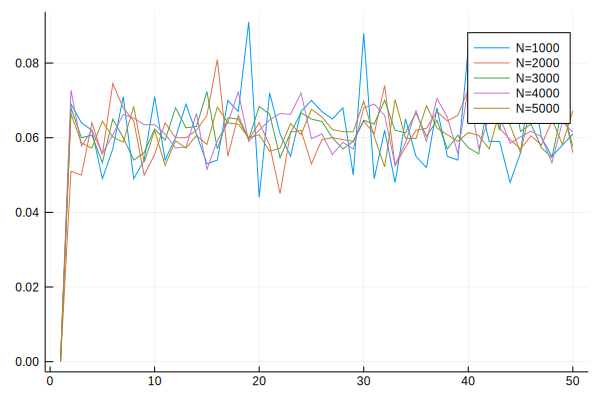

In [34]:
p = 0.1
n_step = 50

plot()
for N in [1000, 2000, 3000, 4000, 5000]
    spin_to_set = Array(1:N)

    result = []
    for t in 1:n_step
        push!(result, cal_phi(spin_to_set))

        for i in 1:2:(N-1)
            if rand() > p
                X_measurement(spin_to_set, i)
            else
                ZZ_measurement(spin_to_set, i, i+1)
            end
        end

        for i in 2:2:(N-1)
            if rand() > p
                X_measurement(spin_to_set, i)
            else
                ZZ_measurement(spin_to_set, i, i+1)
            end
        end
    end
    
    plot!(result, label=string("N=", N))
end
plot!()

### $p=0.9$ case

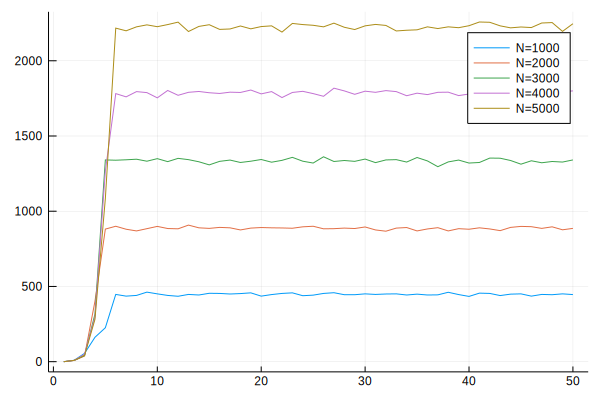

In [35]:
N = 5000
p = 0.9
n_step = 50

plot()
for N in [1000, 2000, 3000, 4000, 5000]
    spin_to_set = Array(1:N)

    result = []
    for t in 1:n_step
        push!(result, cal_phi(spin_to_set))

        for i in 1:2:(N-1)
            if rand() > p
                X_measurement(spin_to_set, i)
            else
                ZZ_measurement(spin_to_set, i, i+1)
            end
        end

        for i in 2:2:(N-1)
            if rand() > p
                X_measurement(spin_to_set, i)
            else
                ZZ_measurement(spin_to_set, i, i+1)
            end
        end
    end
    
    plot!(result, label=string("N=", N))
end
plot!()

### $p=0.5$ case

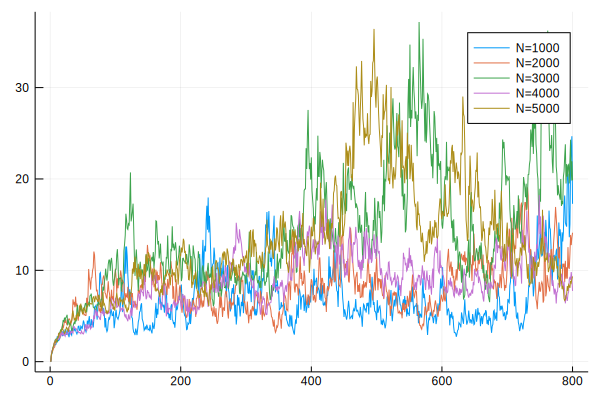

In [36]:
N = 5000
p = 0.5
n_step = 800

plot()
for N in [1000, 2000, 3000, 4000, 5000]
    spin_to_set = Array(1:N)

    result = []
    for t in 1:n_step
        push!(result, cal_phi(spin_to_set))

        for i in 1:2:(N-1)
            if rand() > p
                X_measurement(spin_to_set, i)
            else
                ZZ_measurement(spin_to_set, i, i+1)
            end
        end

        for i in 2:2:(N-1)
            if rand() > p
                X_measurement(spin_to_set, i)
            else
                ZZ_measurement(spin_to_set, i, i+1)
            end
        end
    end
    
    plot!(result, label=string("N=", N))
end
plot!()

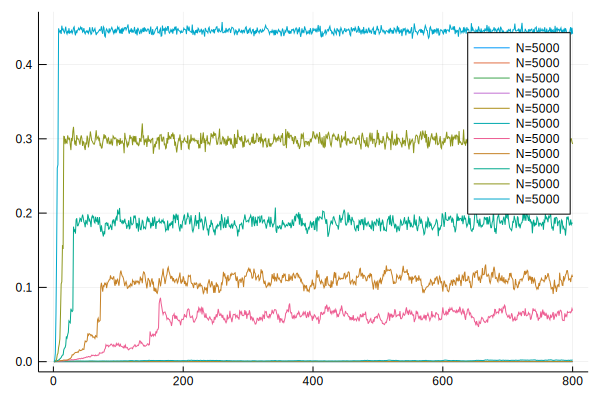

In [20]:
N = 5000
n_step = 800

plot()
for p in [0.1, 0.3, 0.4, 0.45, 0.475, 0.5, 0.525, 0.55, 0.6, 0.7, 0.9]
    spin_to_set = Array(1:N)

    result = []
    for t in 1:n_step
        push!(result, cal_phi(spin_to_set) / N)

        for i in 1:2:(N-1)
            if rand() > p
                X_measurement(spin_to_set, i)
            else
                ZZ_measurement(spin_to_set, i, i+1)
            end
        end

        for i in 2:2:(N-1)
            if rand() > p
                X_measurement(spin_to_set, i)
            else
                ZZ_measurement(spin_to_set, i, i+1)
            end
        end
    end
    
    plot!(result, label=string("p=", p))
end
plot!()

### Is the transition continues or not?

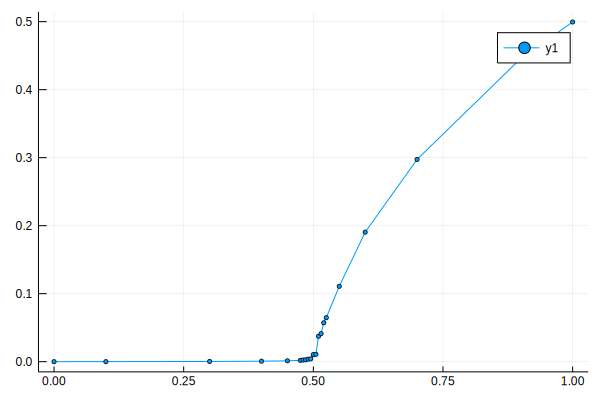

In [37]:
N = 1000
n_step = 800
p_list = [0.0, 0.1, 0.3, 0.4, 0.45, 0.475, 0.48, 0.485,0.490,0.495, 0.5,
    0.505, 0.510, 0.515, 0.520, 0.525, 0.55, 0.6, 0.7, 0.9, 1.0]

stable_values  = []

for p in p_list
    spin_to_set = Array(1:N)

    result = []
    for t in 1:n_step
        push!(result, cal_phi(spin_to_set) / N)

        for i in 1:2:(N-1)
            if rand() > p
                X_measurement(spin_to_set, i)
            else
                ZZ_measurement(spin_to_set, i, i+1)
            end
        end

        for i in 2:2:(N-1)
            if rand() > p
                X_measurement(spin_to_set, i)
            else
                ZZ_measurement(spin_to_set, i, i+1)
            end
        end
    end
    
    push!(stable_values, sum(result[301:end]) / 500)
end

plot(p_list, stable_values, marker=2)

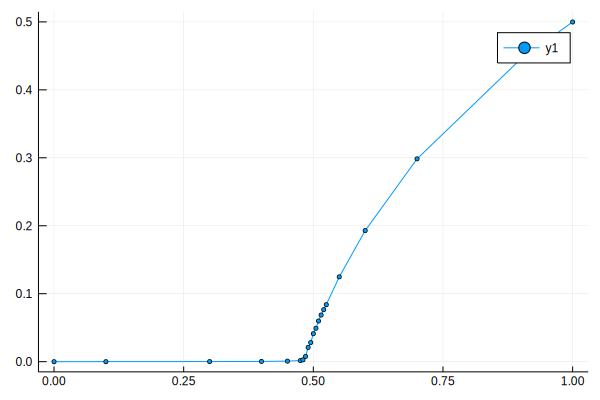

In [10]:
N = 3000
n_step = 800
p_list = [0.0, 0.1, 0.3, 0.4, 0.45, 0.475, 0.48, 0.485,0.490,0.495, 0.5,
    0.505, 0.510, 0.515, 0.520, 0.525, 0.55, 0.6, 0.7, 0.9, 1.0]

stable_values  = []

for p in p_list
    spin_to_set = Array(1:N)

    result = []
    for t in 1:n_step
        push!(result, cal_phi(spin_to_set) / N)

        for i in 1:2:(N-1)
            if rand() > p
                X_measurement(spin_to_set, i)
            else
                ZZ_measurement(spin_to_set, i, i+1)
            end
        end

        for i in 2:2:(N-1)
            if rand() > p
                X_measurement(spin_to_set, i)
            else
                ZZ_measurement(spin_to_set, i, i+1)
            end
        end
    end
    
    push!(stable_values, sum(result[301:end]) / (n_step - 300))
end

plot(p_list, stable_values, marker=2)

### At $p=0.5$, how does $\Phi$ scale with the system size?

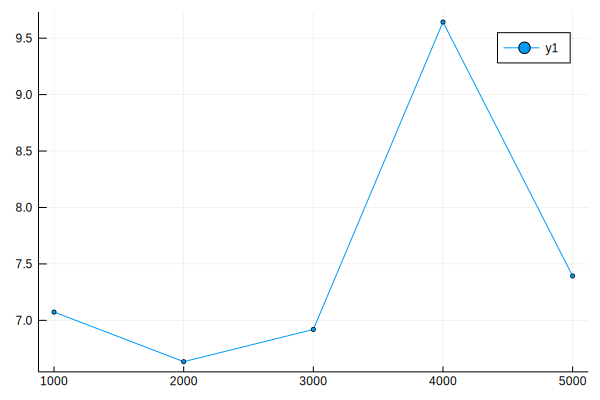

In [22]:
n_step = 1000
N_list = [1000, 2000, 3000, 4000, 5000]
p = 0.5

stable_values  = []

for N in N_list
    spin_to_set = Array(1:N)

    result = []
    for t in 1:n_step
        push!(result, cal_phi(spin_to_set))

        for i in 1:2:(N-1)
            if rand() > p
                X_measurement(spin_to_set, i)
            else
                ZZ_measurement(spin_to_set, i, i+1)
            end
        end

        for i in 2:2:(N-1)
            if rand() > p
                X_measurement(spin_to_set, i)
            else
                ZZ_measurement(spin_to_set, i, i+1)
            end
        end
    end
    
    push!(stable_values, sum(result[401:end]) / (n_step - 400))
end

plot(N_list, stable_values, marker=2)

### Entanglement Entropy as critial point $p=0.5$

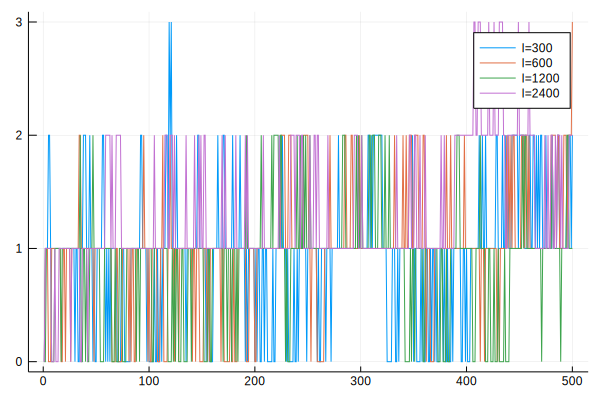

In [44]:
p = 0.5
n_step = 500
N = 5000

plot()
for l in [300 600 1200 2400]
    spin_to_set = Array(1:N)

    result = []
    for t in 1:n_step
        push!(result, cal_EE(spin_to_set, 1:l, N))

        for i in 1:2:(N-1)
            if rand() > p
                X_measurement(spin_to_set, i)
            else
                ZZ_measurement(spin_to_set, i, i+1)
            end
        end

        for i in 2:2:(N-1)
            if rand() > p
                X_measurement(spin_to_set, i)
            else
                ZZ_measurement(spin_to_set, i, i+1)
            end
        end
    end
    
    plot!(result, label=string("l=", l))
end
plot!()

1

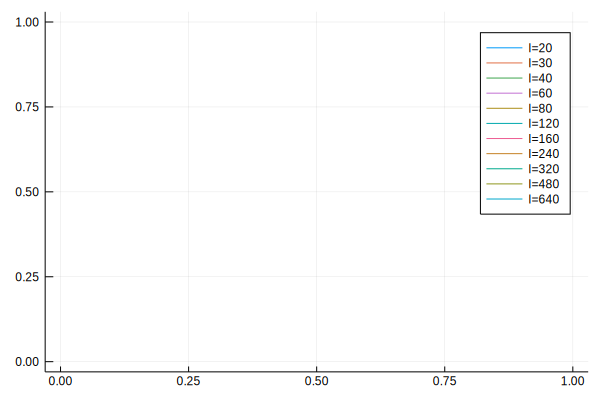

In [43]:
p = 0.5
n_step = 1000
N = 1500
n_average = 100

l_list = [20, 30, 40, 60, 80, 120, 160, 240, 320, 480, 640]

stable_vals = []
result = zeros(n_step, length(l_list))

for e in 1:n_average
    display(e)
    spin_to_set = Array(1:N)
    
    for t in 1:n_step
        result[t, :] .+= [cal_EE2(spin_to_set, N - l + 1, N) for l in l_list]

        for i in 1:2:(N-1)
            if rand() > p
                X_measurement(spin_to_set, i)
            else
                ZZ_measurement(spin_to_set, i, i+1)
            end
        end

        for i in 2:2:(N-1)
            if rand() > p
                X_measurement(spin_to_set, i)
            else
                ZZ_measurement(spin_to_set, i, i+1)
            end
        end
    end
end

stable_vals = mean(result[200:end, :], dims=1) ./ n_average
plot()
for i in 1:length(l_list)
    plot!(result[:, i] ./ n_average, label=string("l=", l_list[i]))
end
plot!()

In [39]:
stable_vals = mean(result[200:end, :], dims=1) ./ n_average

1×11 Array{Float64,2}:
 1.35398  1.38705  1.40689  1.42493  …  1.39298  1.37268  1.37875  1.33044

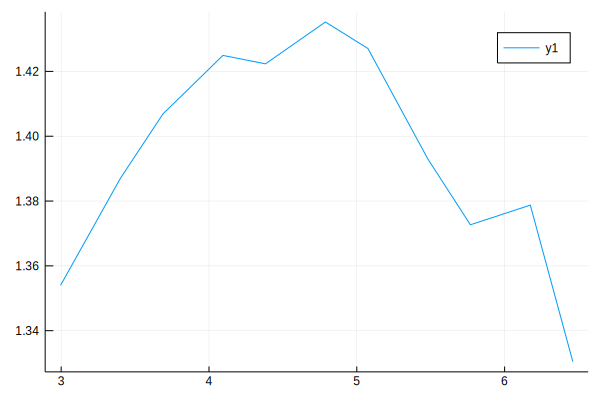

In [40]:
plot(log.(l_list), stable_vals[1,:])
# linreg(log.(l_list), stable_vals[1,:])
plot!()


In [43]:
function X_measurement(spin_to_set, idx)
    set = spin_to_set[idx]
    if set != idx
        spin_to_set[idx] = idx
        return
    else
        indices = findall(spin_to_set .==set)
        if length(indices)==1
            return
        end
        new_set = indices[2]
        spin_to_set[indices[2:end]] .= new_set
    end
end

tmp = Array(1:6)
ZZ_measurement(tmp, 2, 3)
ZZ_measurement(tmp, 4,5)
ZZ_measurement(tmp, 3,4, )
X_measurement(tmp, 3)
X_measurement(tmp, 2)
tmp

6-element Array{Int64,1}:
 1
 2
 3
 4
 4
 6

In [30]:
p = 0.5
n_step = 10
N = 10
n_average = 1

l = 3

stable_vals = []
result = zeros(n_step, length(l_list))

for e in 1:n_average
    spin_to_set = Array(1:N)
    
    for t in 1:n_step
        print(spin_to_set, '\n')
        if cal_EE(spin_to_set, 1:l-1, N) != cal_EE2(spin_to_set, l, N)
            print(cal_EE(spin_to_set, 1:l-1, N), " ", cal_EE2(spin_to_set, l, N), "\n")
        end

        for i in 1:2:(N-1)
            if rand() > p
                X_measurement(spin_to_set, i)
            else
                ZZ_measurement(spin_to_set, i, i+1)
            end
        end

        for i in 2:2:(N-1)
            if rand() > p
                X_measurement(spin_to_set, i)
            else
                ZZ_measurement(spin_to_set, i, i+1)
            end
        end
    end
end

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 2, 4, 4, 4, 4, 4, 4, 10]
[1, 1, 1, 4, 5, 6, 7, 8, 1, 1]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 1]
[1, 2, 2, 2, 2, 6, 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 8, 8]
[1, 2, 3, 4, 5, 6, 7, 8, 8, 8]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[1, 2, 2, 2, 2, 6, 2, 8, 2, 2]
